# Initialize Library

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_predict, learning_curve
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings(action='once')
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

# Init

## Initialize Dataframe

In [255]:
df = pd.read_csv('german.data', delimiter=" ", header=None)
df.columns = [
  "status_existing_checking",
  "duration_month",
  "credit_history",
  "purpose",
  "credit_amount",
  "saving account/bonds",
  "employment_duration",
  "installment_rate",
  "status_sex",
  "other_debtors_guarantors",
  "duration_residency",
  "property",
  "age",
  "installment_plans",
  "housing_status",
  "number_of_existing_credits",
  "job",
  "number_of_people_to_provide_maintenance",
  "phone",
  "is_foreign_worker",
  "target"
]
df.sample(5)

,status_existing_checking,duration_month,credit_history,purpose,credit_amount,saving account/bonds,employment_duration,installment_rate,status_sex,other_debtors_guarantors,...,property,age,installment_plans,housing_status,number_of_existing_credits,job,number_of_people_to_provide_maintenance,phone,is_foreign_worker,target
438,A11,42,A34,A45,3394,A61,A71,4,A93,A102,...,A123,65,A143,A152,2,A171,1,A191,A201,1
447,A12,7,A32,A43,2576,A61,A73,2,A93,A103,...,A121,35,A143,A152,1,A173,1,A191,A201,1
263,A14,12,A34,A46,2748,A61,A75,2,A92,A101,...,A124,57,A141,A153,3,A172,1,A191,A201,1
706,A12,48,A32,A40,6560,A62,A74,3,A93,A101,...,A122,24,A143,A152,1,A173,1,A191,A201,2
413,A14,10,A32,A40,1597,A63,A73,3,A93,A101,...,A124,40,A143,A151,1,A172,2,A191,A202,1


## Descriptive Statistic

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   status_existing_checking                 1000 non-null   object
 1   duration_month                           1000 non-null   int64 
 2   credit_history                           1000 non-null   object
 3   purpose                                  1000 non-null   object
 4   credit_amount                            1000 non-null   int64 
 5   saving account/bonds                     1000 non-null   object
 6   employment_duration                      1000 non-null   object
 7   installment_rate                         1000 non-null   int64 
 8   status_sex                               1000 non-null   object
 9   other_debtors_guarantors                 1000 non-null   object
 10  duration_residency                       1000 non-null   int6

In [257]:
df.isna().sum()

status_existing_checking                   0
duration_month                             0
credit_history                             0
purpose                                    0
credit_amount                              0
saving account/bonds                       0
employment_duration                        0
installment_rate                           0
status_sex                                 0
other_debtors_guarantors                   0
duration_residency                         0
property                                   0
age                                        0
installment_plans                          0
housing_status                             0
number_of_existing_credits                 0
job                                        0
number_of_people_to_provide_maintenance    0
phone                                      0
is_foreign_worker                          0
target                                     0
dtype: int64

In [258]:
df.duplicated().sum()

0

as see on the descriptive information above, there's no null value and no duplicated data

## Sneak Peek into the Data

In [259]:
n = [1,4,7,10,12,15,17,20]
c = [0,2,3,5,6,8,9,11,13,14,16,18,19]

numericals = []
categoricals = []
for i, col in enumerate(df.columns):
  if i in n:
    numericals.append(col)
  else:
    categoricals.append(col)

print('total numerical features:', len(numericals))
print('total categorical features:', len(categoricals))

total numerical features: 8
total categorical features: 13


In [260]:
df[numericals].describe()

,duration_month,credit_amount,installment_rate,duration_residency,age,number_of_existing_credits,number_of_people_to_provide_maintenance,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [261]:
df[categoricals].describe()

,status_existing_checking,credit_history,purpose,saving account/bonds,employment_duration,status_sex,other_debtors_guarantors,property,installment_plans,housing_status,job,phone,is_foreign_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


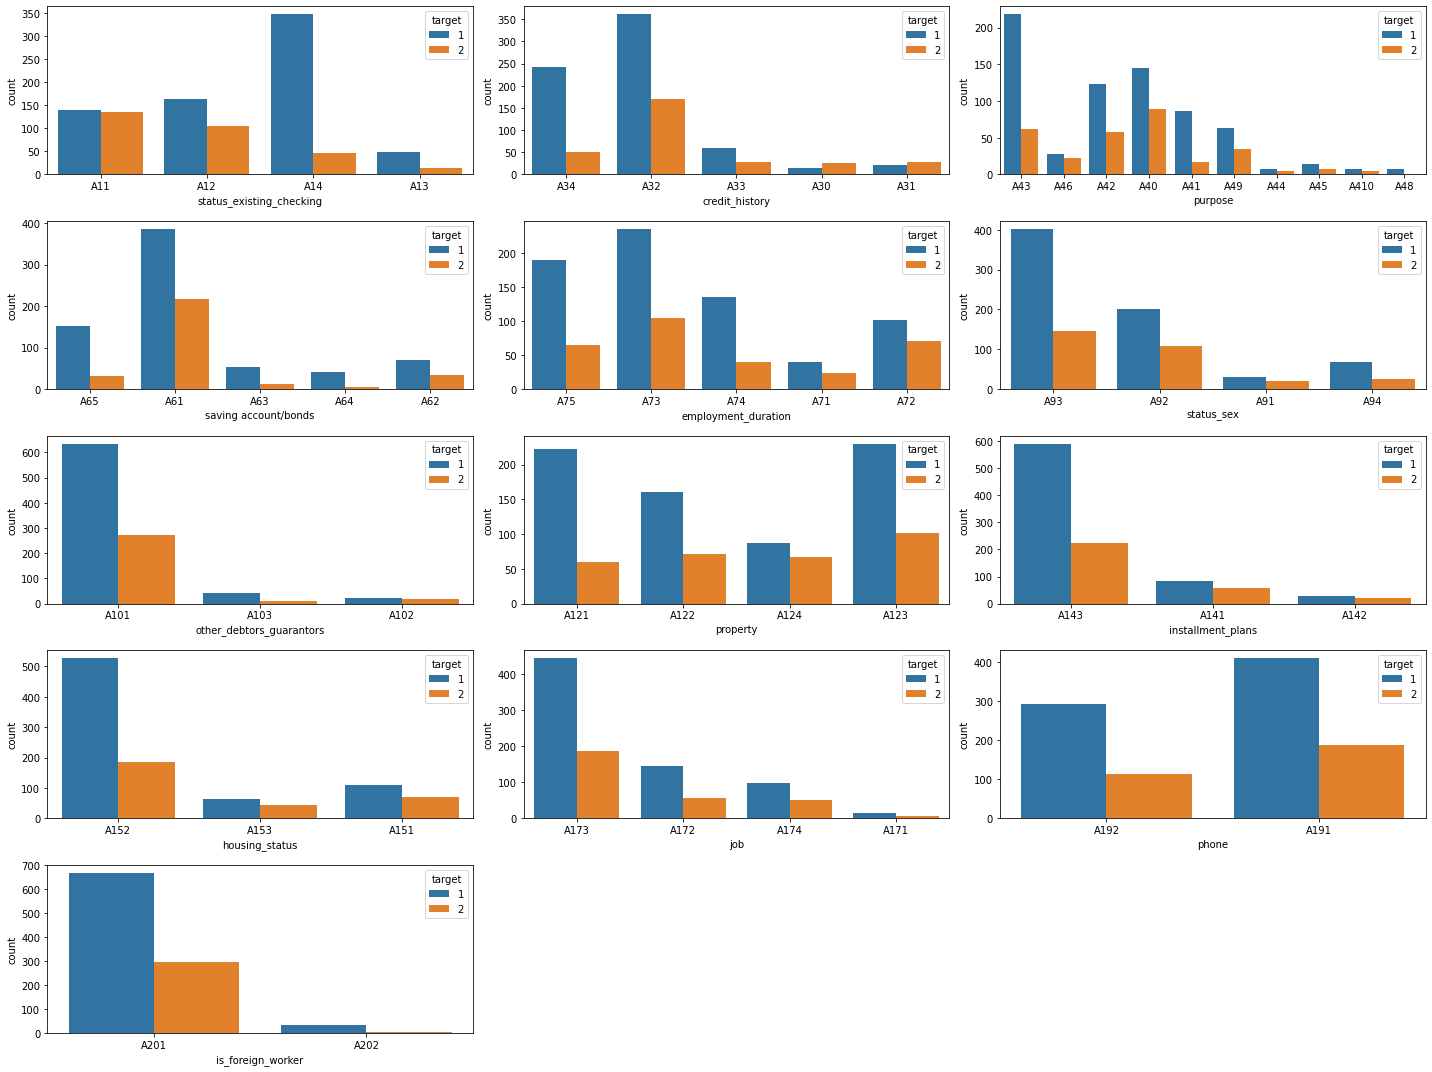

In [262]:
plt.figure(figsize=(20, 15))
for i in range(0, len(categoricals)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x = df[categoricals[i]], orient='v', hue=df['target'])
    plt.tight_layout()

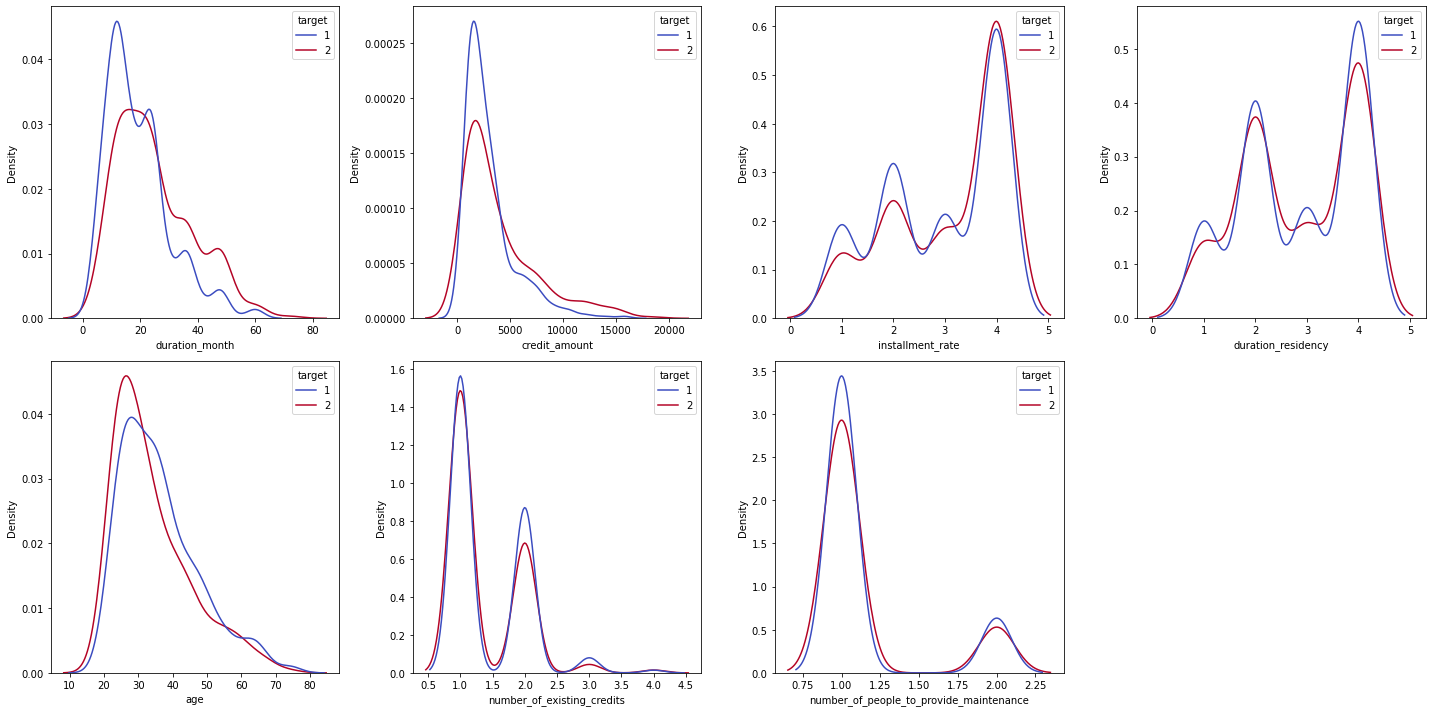

In [263]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numericals)):
  if i == len(numericals) - 1:
    continue
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x=df[numericals[i]], palette='coolwarm', hue=df['target'], common_norm=False)
  plt.xlabel(numericals[i])
  plt.tight_layout()

# Data Cleansing

## Outliers

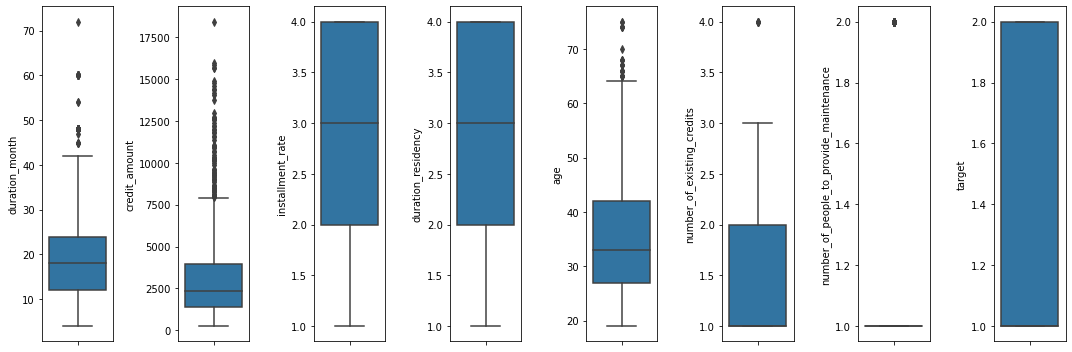

In [264]:
plt.figure(figsize=(15, 5))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]])
    plt.tight_layout()

Feature `age` won't be handled cause logically people aged 70++ y.o still make sense, so this time i will only handle the outlier for `duration_month` and `credit_amount`. this time I will be using the conservative method for reducing the outliers by using Z-Score method.

In [265]:
print(f'Rows before outlier handling: {len(df)}')
outlier_handled_features = ['duration_month', 'credit_amount']
for i in outlier_handled_features:
  zscore = np.abs(stats.zscore(df[i]))
  filtered_entries = (zscore < 3)
  df = df[filtered_entries]
print(f'Rows after outlier handling: {len(df)}')

Rows before outlier handling: 1000
Rows after outlier handling: 962


## Splitting Data into Train and Test

In [266]:
df_train,df_test = train_test_split(df,test_size=0.2, random_state=42)

## Feature Transformation

In [267]:
dataset = [df_train, df_test]

In [268]:
for i in dataset:
  i['log_duration_month'] = np.log(i['duration_month'])
  i['log_age'] = np.log(i['age'])
  i['log_credit_amount'] = np.log(i['credit_amount'])

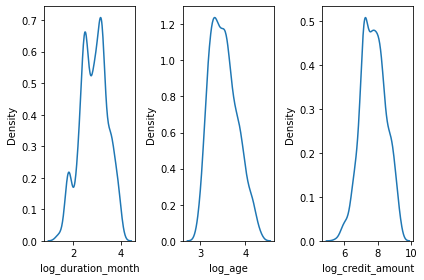

In [269]:
logged_feature = ['log_duration_month', 'log_age', 'log_credit_amount']
for i in range(0, len(logged_feature)):
  plt.subplot(1, 3, i+1)
  sns.kdeplot(x=df_train[logged_feature[i]], palette='coolwarm')
  plt.xlabel(logged_feature[i])
  plt.tight_layout()

In [270]:
future_dropped_columns = ['log_duration_month','log_age','log_credit_amount']

transform_feature = [
  'log_duration_month',
  'log_age',
  'log_credit_amount',
  'installment_rate',
  'duration_residency',
  'number_of_existing_credits',
  'number_of_people_to_provide_maintenance',
]

for i in transform_feature:
  for j in dataset:
    naming_normalize = i + "_norm"
    naming_standardize = i + "_std"
    future_dropped_columns.append(naming_normalize)
    j[naming_standardize] = StandardScaler().fit_transform(j[i].values.reshape(len(j), 1))
    j[naming_normalize] = MinMaxScaler().fit_transform(j[naming_standardize].values.reshape(len(j), 1))

In [271]:
future_dropped_columns = [i for n, i in enumerate(future_dropped_columns) if i not in future_dropped_columns[:n]]
for i,j in enumerate(numericals):
  if j == 'target':
    continue
  future_dropped_columns.append(j)

future_dropped_columns

['log_duration_month',
 'log_age',
 'log_credit_amount',
 'log_duration_month_norm',
 'log_age_norm',
 'log_credit_amount_norm',
 'installment_rate_norm',
 'duration_residency_norm',
 'number_of_existing_credits_norm',
 'number_of_people_to_provide_maintenance_norm',
 'duration_month',
 'credit_amount',
 'installment_rate',
 'duration_residency',
 'age',
 'number_of_existing_credits',
 'number_of_people_to_provide_maintenance']

In [272]:
for i in dataset:
  i.drop(columns=future_dropped_columns, inplace=True)

## Encoding

In [273]:
label_encoding = ['status_existing_checking', 'credit_history', 'saving account/bonds', 'employment_duration', 'status_sex', 'other_debtors_guarantors', 'property', 'housing_status', 'job', 'phone', 'is_foreign_worker']
one_hot = ['purpose', 'installment_plans']
label_encoder = LabelEncoder()
for i in dataset:
  for j in label_encoding:
    feature_encoded = j + "_category"
    i[feature_encoded] = label_encoder.fit_transform(i[j])
  for x in one_hot:
    one_hot_prefix = x.split('_')[0]
    one_hot_encoding = pd.get_dummies(i[x], prefix = one_hot_prefix)
    if i.shape[0] > 500:
      df_train = df_train.join(one_hot_encoding)
    else:
      df_test = df_test.join(one_hot_encoding)

In [274]:
dataset = [df_train, df_test]
for i in dataset:
  i.drop(columns = (label_encoding + one_hot), inplace=True)

In [275]:
if df_train.shape[1] > df_test.shape[1]:
  missing = df_train.columns.difference(df_test.columns)
  df_test[missing] = df_test.apply(lambda x: 0, axis=1)

if df_test.shape[1] > df_train.shape[1]:
  missing = df_test.columns.difference(df_train.columns)
  df_train[missing] = df_train.apply(lambda x: 0, axis=1)

In [276]:
if df_train.shape[1] == df_test.shape[1]:
  print('ok') 

ok


## Check Data Imbalance

In [277]:
X = df_train[[col for col in df_train.columns if (str(df_train[col].dtype) != 'object') and col != 'target']]
y = df_train['target'].values
print(pd.Series(y).value_counts())

1    556
2    213
dtype: int64


# Model Machine Learning

In [278]:
X_train = X
y_train = y
X_test = df_test[[col for col in df_test.columns if (str(df_test[col].dtype) != 'object') and col != 'target']]
y_test = df_test['target'].values

In [279]:
def eval_classification(name, model, pred, xtrain, ytrain, xtest, ytest):
    print("---" + name + "----")
    print("Train Score): %.2f" % model.score(xtrain, ytrain))
    print("Test Score): %.2f" % model.score(xtest, y_test))
    print("Accuracy (Test on train Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test on train Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test on train Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test on train Set): %.2f" % f1_score(ytest, pred))
    print(" ")
    model_name.append(name)
    score_acc_list.append(round(accuracy_score(y_test, y_pred),2))
    precision_score_list.append(round(precision_score(y_test, y_pred),2))
    recall_score_list.append(round(recall_score(y_test, y_pred),2))
    train_score.append(model.score(xtrain, ytrain))
    test_score.append(model.score(xtest, y_test))

## Initiate Model

In [280]:
models = []
models.append((
  'Logistic Regression',
  LogisticRegression(random_state = 123),
))
models.append((
  'Decision Tree',
  DecisionTreeClassifier(random_state = 123),
))
models.append((
  'Random Forest',
  RandomForestClassifier(random_state = 123),
))
models.append((
  "XGBoost",
  XGBClassifier(random_state=123, eval_metric='logloss'),
))

## Train Model Loop

In [281]:
result_modelling = {}
model_name = []
train_score = []
test_score = []
recall_score_list = []
score_acc_list = []
precision_score_list = []

for name, model in models:
    params = model.fit(X_train, y_train)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    eval_classification(name ,params, y_pred, X_train, y_train, X_test, y_test)

---Logistic Regression----
Train Score): 0.79
Test Score): 0.77
Accuracy (Test on train Set): 0.77
Precision (Test on train Set): 0.77
Recall (Test on train Set): 0.94
F1-Score (Test on train Set): 0.85
 
---Decision Tree----
Train Score): 1.00
Test Score): 0.67
Accuracy (Test on train Set): 0.67
Precision (Test on train Set): 0.75
Recall (Test on train Set): 0.79
F1-Score (Test on train Set): 0.77
 
---Random Forest----
Train Score): 1.00
Test Score): 0.76
Accuracy (Test on train Set): 0.76
Precision (Test on train Set): 0.76
Recall (Test on train Set): 0.94
F1-Score (Test on train Set): 0.84
 
---XGBoost----
Train Score): 1.00
Test Score): 0.73
Accuracy (Test on train Set): 0.73
Precision (Test on train Set): 0.78
Recall (Test on train Set): 0.83
F1-Score (Test on train Set): 0.81
 


## Result Modelling

In [282]:
result_modelling['model_name'] = model_name
result_modelling['recall_score'] = recall_score_list
result_modelling['accuracy_score'] = score_acc_list
result_modelling['precision_score'] = precision_score_list
result_modelling['train_score'] = train_score
result_modelling['test_score'] = test_score

df_result = pd.DataFrame(result_modelling)
df_result

,model_name,recall_score,accuracy_score,precision_score,train_score,test_score
0,Logistic Regression,0.94,0.77,0.77,0.794538,0.766839
1,Decision Tree,0.79,0.67,0.75,1.000000,0.673575
2,Random Forest,0.94,0.76,0.76,1.000000,0.756477
3,XGBoost,0.83,0.73,0.78,1.000000,0.730570


# Predict Using Logistic Regression & Export

In [284]:
model = LogisticRegression(random_state = 123)
model.fit(X_train, y_train)
df_all = pd.concat([df_test, df_train])
X_all = df_all[[col for col in df_train.columns if (str(df_train[col].dtype) != 'object') and col != 'target']]
prediction = model.predict(X_all)

df_all['target'] = prediction

In [286]:
df_all.to_csv('result-modelling-german-credit-data.csv', index=False)